In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing dataset after cleaning and encoding the categorical variables

In [3]:
df=pd.read_csv('cleaned_dataset.csv')

In [4]:
df.head()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
#analysing data like
#GOAL : 2 classes Churners and non-Churners
#which features are the driving factors for churn

#### Do churners call customer service more?

In [5]:
#taking a part of the dataframe and analysing
ff=df.loc[:,['Custserv_calls','Vmail_message','Int_plan','Churn']]
#using groupby()
#df.groupby(['Churn']).mean()
ff.head()

,Custserv_calls,Vmail_message,Int_plan,Churn
0,1,25,0,0
1,1,26,0,0
2,0,0,0,0
3,2,0,1,0
4,3,0,1,0


In [6]:
ff.groupby(['Churn']).std()

,Custserv_calls,Vmail_message,Int_plan
Churn,,,
0,1.163901,13.848080,0.247683
1,1.822432,11.418575,0.451058


In [8]:
ff.groupby(['Churn']).mean()
#the mean and std of customer services calls for the churners is high compared to non-churners

,Custserv_calls,Vmail_message,Int_plan
Churn,,,
0,1.455693,8.385761,0.065640
1,2.239329,4.614329,0.283537


In [7]:
#Churning in some area_codes is more compared to others-- 
gg=pd.read_csv('df_after_enc.csv')
gg.groupby('Area_code')['Churn'].value_counts()

Area_code  Churn
408        0         996
           1         165
415        0        1981
           1         318
510        0         984
           1         173
Name: Churn, dtype: int64

### EDA with visualization

In [8]:
df.head()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [9]:
#checking the distribution of variables-normal distrubition(-1.96 to +1.96)
from scipy import stats

In [12]:
list=['Acc_len', 'Area_code','Vmail_message', 'Day_min', 'Day_calls', 'Day_charge', 'Eve_mins',
       'Eve_calls', 'Eve_charge', 'Night_mins', 'Night_calls', 'Night_charge',
       'Int_mins', 'Int_calls', 'Int_charge', 'Custserv_calls']
for i in list:
    print('skewness and Kurtosis for '+ str(i)+': '+str(stats.skew(df[i]))+' and '+ str(stats.kurtosis(df[i])))

skewness and Kurtosis for Acc_len: 0.10621316744599318 and -0.0937513108437864
skewness and Kurtosis for Area_code: 1.134964594925911 and -0.6865952826512816
skewness and Kurtosis for Vmail_message: 1.3263030509972922 and 0.12209308548663644
skewness and Kurtosis for Day_min: -0.002947284016695239 and -0.04365222612737929
skewness and Kurtosis for Day_calls: -0.08098712687907403 and 0.19463514964618556
skewness and Kurtosis for Day_charge: -0.0029508087758798626 and -0.04351742102672107
skewness and Kurtosis for Eve_mins: -0.0052781500846280525 and 0.042283656150823745
skewness and Kurtosis for Eve_calls: -0.01754836130740179 and 0.13453389767071755
skewness and Kurtosis for Eve_charge: -0.005250110884106289 and 0.042175304917122514
skewness and Kurtosis for Night_mins: 0.02050841390755843 and 0.06004343141054003
skewness and Kurtosis for Night_calls: 0.03087626932619969 and 0.06744148412465867
skewness and Kurtosis for Night_charge: 0.020500316821170136 and 0.06001463464630463
skewnes

In [13]:
#conclusion: we can see the Normality for International calls is not statisfied

/Users/ashok/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


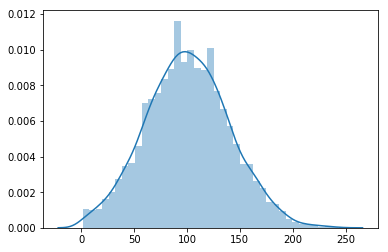

In [10]:
#checking the acclength distribution- it is normal
sns.distplot([df.Acc_len])

/Users/ashok/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


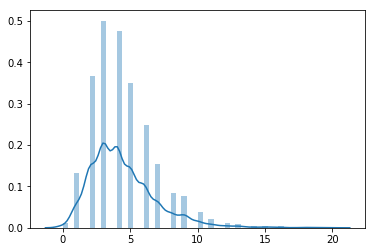

In [11]:
#whereas for intcalls it is not
sns.distplot([df.Int_calls])

#### Checking Acc_len for churners and non churners

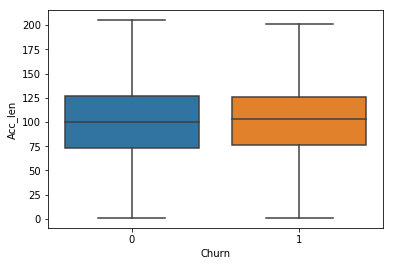

In [12]:
#comparing the results there is not much difference
sns.boxplot(x='Churn',y='Acc_len',data=df,sym="")

In [17]:
#adding 3rd variable Internation plan for the above analysis and compare the churn results

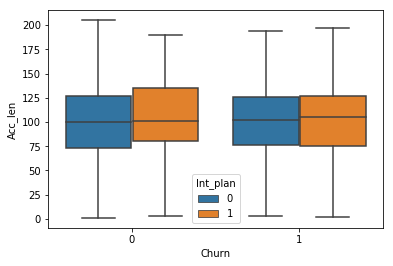

In [18]:
sns.boxplot(x='Churn',y='Acc_len',data=df,sym="",hue='Int_plan')

### Comapring churn with customer service calls and also with international plan

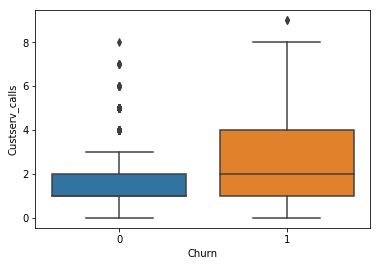

In [19]:
sns.boxplot(x='Churn',y='Custserv_calls',data=df)

In [20]:
#we can see that churners call customer service more
#checking with international plan now

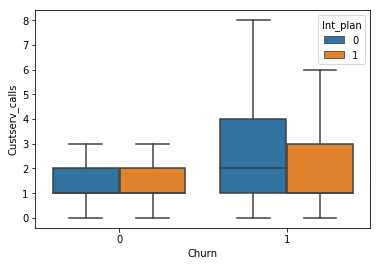

In [21]:
sns.boxplot(x='Churn',y='Custserv_calls',data=df,hue='Int_plan',sym="")

### conclusion : Customer who churn call customer service more unless they have opted for international plan they do lesser number of calls

### Comparing churn with customer service calls and voice mail plans

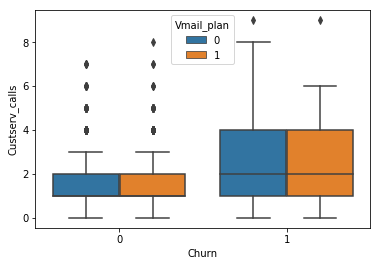

In [22]:
sns.boxplot(x='Churn',y='Custserv_calls',data=df,hue='Vmail_plan')

### Comparing churn with customer service calls and area code

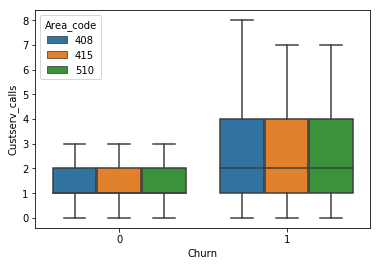

In [23]:
sns.boxplot(x='Churn',y='Custserv_calls',data=df,hue='Area_code',sym="")

In [24]:
df.columns

Index(['State', 'Acc_len', 'Area_code', 'Int_plan', 'Vmail_plan',
       'Vmail_message', 'Day_min', 'Day_calls', 'Day_charge', 'Eve_mins',
       'Eve_calls', 'Eve_charge', 'Night_mins', 'Night_calls', 'Night_charge',
       'Int_mins', 'Int_calls', 'Int_charge', 'Custserv_calls', 'Churn'],
      dtype='object')

### comparing churn with minutes

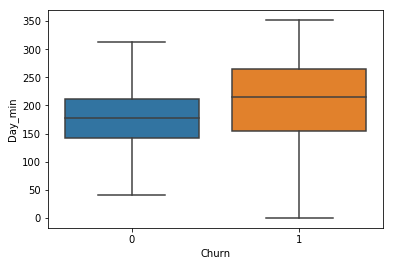

In [25]:
sns.boxplot(x='Churn',y='Day_min',data=df,sym="")

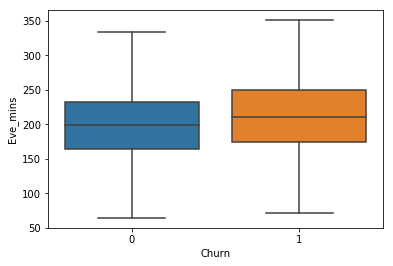

In [26]:
sns.boxplot(x='Churn',y='Eve_mins',data=df,sym="")

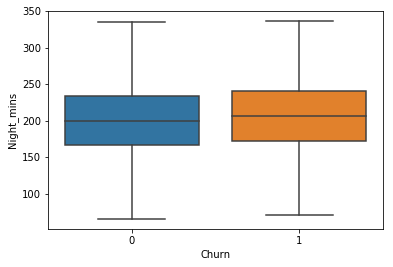

In [27]:
sns.boxplot(x='Churn',y='Night_mins',data=df,sym="")